In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import math
df = pandas.read_csv('files/train.csv')

In [2]:
df = df[df.price_doc<8*(10**7)]
df = df[df.life_sq < df.full_sq]
df = df[df.life_sq < 2000]
df = df[df.full_sq < 2000]
df = df[df.num_room < 7]
df = df[df.build_year <2020]
df = df[df.build_year >1950]
df = df[df.kitch_sq < 40]
df = df[df.public_healthcare_km < 30]
df = df[df.metro_min_avto < 30]
df = df[df.metro_min_walk < 30]
df = df[df.museum_km < 30]
df = df[df.fitness_km < 15]
df = df[df.market_shop_km < 20]
df = df[df.public_transport_station_km < 7.5]
df = df[df.workplaces_km< 40]
df = df[df.detention_facility_km< 60]
df = df[df.additional_education_km <20]
df = df[df.big_church_km <20]
df = df[df.hospice_morgue_km <20]
df = df[df.green_zone_km <20]
df = df[df.catering_km < 8]

In [4]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression

In [3]:
train_columns = list(
 	set(df.select_dtypes(include=['float64', 'int64']).columns) - set(['id', 'timestamp', 'price_doc','ID_big_road1']))

In [5]:
y = df['price_doc'].values
x = df[train_columns].values
y = y[~np.isnan(x).any(axis=1)]
x = x[~np.isnan(x).any(axis=1)]

In [6]:

test = SelectKBest(score_func=chi2,k=20)
model = test.fit(x,y)
np.set_printoptions(precision=4)
scores = model.transform(x)

In [7]:
support = model.get_support()
features = df.loc[:,support].columns.tolist()
features

['children_school',
 'sport_objects_raion',
 'additional_education_raion',
 'young_female',
 'ekder_all',
 'build_count_frame',
 'build_count_monolith',
 'cemetery_km',
 'public_transport_station_min_walk',
 'oil_chemistry_km',
 'ice_rink_km',
 'basketball_km',
 'cafe_count_1000_price_1000',
 'cafe_count_1000_price_high',
 'leisure_count_1000',
 'office_count_1500',
 'cafe_sum_2000_max_price_avg',
 'office_count_3000',
 'trc_count_5000',
 'trc_sqm_5000']

['max_floor',
 'university_top_20_raion',
 'shopping_centers_raion',
 'work_all',
 '0_6_female',
 '7_14_all',
 'build_count_monolith',
 'build_count_mix',
 'water_treatment_km',
 'big_road1_km',
 'fitness_km',
 'ice_rink_km',
 'stadium_km',
 'hospice_morgue_km',
 'additional_education_km',
 'office_sqm_500',
 'cafe_count_500_price_1500',
 'cafe_count_500_price_4000',
 'cafe_count_1000_price_1000',
 'cafe_count_3000_price_2500']

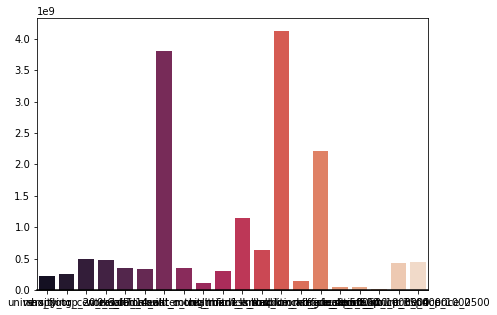

In [75]:
import seaborn as sns
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
x1 = np.array(features)
scores2 = []
for i in range(len(model.scores_)):
    if support[i] == True:
        scores2.append(model.scores_[i])

y1 = np.array(scores2)
sns.barplot(x=x1,y=scores2,palette='rocket',ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
features

In [76]:
test = SelectKBest(score_func=f_regression,k=20)
model = test.fit(x,y)
np.set_printoptions(precision=4)
scores = model.transform(x)

In [77]:
support = model.get_support()
features = df.loc[:,support].columns.tolist()
features

['kitch_sq',
 'state',
 'indust_part',
 'full_all',
 'work_female',
 '0_13_female',
 'build_count_monolith',
 'build_count_after_1995',
 'metro_km_avto',
 'green_zone_km',
 'industrial_km',
 'sadovoe_km',
 'ID_big_road2',
 'leisure_count_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_count_1500_na_price',
 'trc_count_2000',
 'cafe_sum_2000_min_price_avg',
 'cafe_count_2000_price_4000',
 'sport_count_3000']

['kitch_sq',
 'state',
 'indust_part',
 'full_all',
 'work_female',
 '0_13_female',
 'build_count_monolith',
 'build_count_after_1995',
 'metro_km_avto',
 'green_zone_km',
 'industrial_km',
 'sadovoe_km',
 'ID_big_road2',
 'leisure_count_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_count_1500_na_price',
 'trc_count_2000',
 'cafe_sum_2000_min_price_avg',
 'cafe_count_2000_price_4000',
 'sport_count_3000']

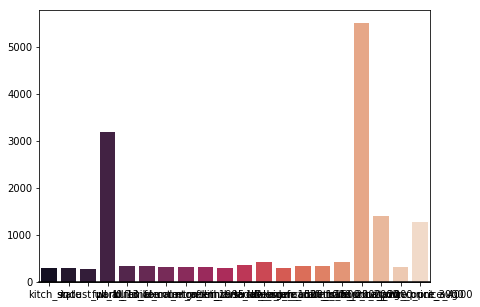

In [78]:
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
x1 = np.array(features)
scores2 = []
for i in range(len(model.scores_)):
    if support[i] == True:
        scores2.append(model.scores_[i])

y1 = np.array(scores2)
sns.barplot(x=x1,y=scores2,palette='rocket',ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
features

shopping_centers_raion
build_count_monolith
fitness_km
ice_rink_km
stadium_km
additional_education_km


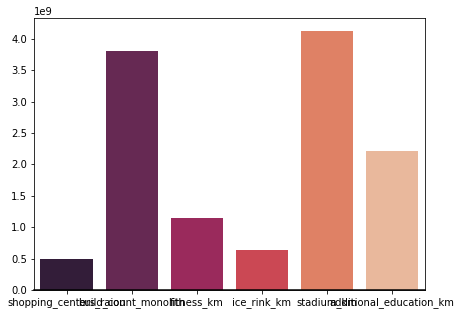

In [104]:
test = SelectKBest(score_func=chi2,k=6)
model = test.fit(x,y)
np.set_printoptions(precision=4)
scores = model.transform(x)
support = model.get_support()
features = df.loc[:,support].columns.tolist()
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
x1 = np.array(features)
scores2 = []
for i in range(len(model.scores_)):
    if support[i] == True:
        scores2.append(model.scores_[i])

y1 = np.array(scores2)
sns.barplot(x=x1,y=scores2,palette='rocket',ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
for i in features:
    print(i)

full_all
sadovoe_km
cafe_count_1500_na_price
trc_count_2000
cafe_sum_2000_min_price_avg
sport_count_3000


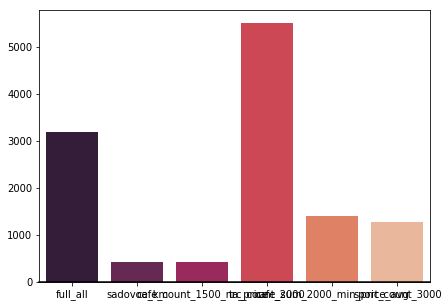

In [84]:
train_columns = list(
 	set(df.select_dtypes(include=['float64','int64']).columns) - set(['id', 'timestamp', 'price_doc','ID_big_road1']))
y = df['price_doc'].values
x = df[train_columns].values
y = y[~np.isnan(x).any(axis=1)]
x = x[~np.isnan(x).any(axis=1)]
test = SelectKBest(score_func=f_regression,k=6)
model = test.fit(x,y)
np.set_printoptions(precision=4)
scores = model.transform(x)
support = model.get_support()
features = df.loc[:,support].columns.tolist()
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
x1 = np.array(features)
scores2 = []
for i in range(len(model.scores_)):
    if support[i] == True:
        scores2.append(model.scores_[i])

y1 = np.array(scores2)
sns.barplot(x=x1,y=scores2,palette='rocket',ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
for i in features:
    print(i)

full_sq
floor
max_floor
material
num_room
sub_area
children_preschool
preschool_quota
preschool_education_centers_raion
children_school


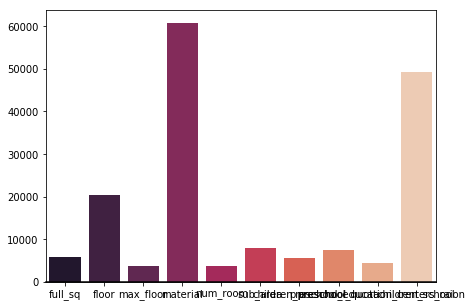

In [93]:
feature = pandas.read_csv('features/features.csv')
train_columns = list(set(feature['name'].values))
y = df['price_doc'].values
x = df[train_columns]
y = y[~np.isnan(x).any(axis=1)]
x = x[~np.isnan(x).any(axis=1)]
test = SelectKBest(score_func=chi2,k=10)
model = test.fit(x,y)
np.set_printoptions(precision=4)
scores = model.transform(x)
support = model.get_support()
features = df.loc[:,support].columns.tolist()
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
x1 = np.array(features)
scores2 = []
for i in range(len(model.scores_)):
    if support[i] == True:
        scores2.append(model.scores_[i])

y1 = np.array(scores2)
sns.barplot(x=x1,y=scores2,palette='rocket',ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
for i in features:
    print(i)

id
timestamp
full_sq
life_sq
floor
max_floor
material
build_year
num_room
kitch_sq


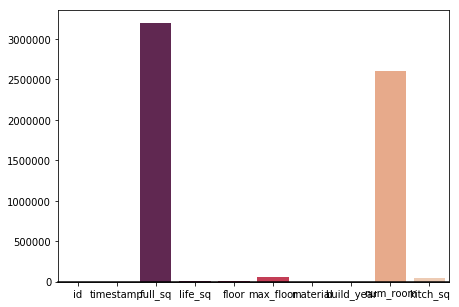

In [100]:
feature = pandas.read_csv('features/features.csv')
train_columns = list(set(feature['name'].values))
y = df['price_doc'].values
x = df[train_columns].values
y = y[~np.isnan(x).any(axis=1)]
x = x[~np.isnan(x).any(axis=1)]
test = SelectKBest(score_func=chi2,k='all')
model = test.fit(x,y)
np.set_printoptions(precision=4)
scores = model.transform(x)
support = model.get_support()
features = df.loc[:,support].columns.tolist()
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
x1 = np.array(features)
scores2 = []
for i in range(len(model.scores_)):
    if support[i] == True:
        scores2.append(model.scores_[i])

y1 = np.array(scores2)
sns.barplot(x=x1,y=scores2,palette='rocket',ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
for i in features:
    print(i)

id
timestamp
full_sq
life_sq
floor
max_floor
material
build_year
num_room
kitch_sq
state
product_type


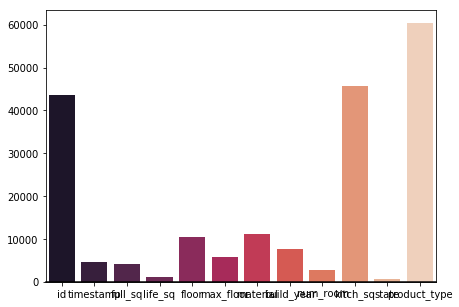

In [105]:
feature = pandas.read_csv('features/features.csv')
train_columns = list(set(feature['name'].values))
y = df['price_doc'].values
x = df[train_columns].values
y = y[~np.isnan(x).any(axis=1)]
x = x[~np.isnan(x).any(axis=1)]
test = SelectKBest(score_func=chi2,k='all')
model = test.fit(x,y)
np.set_printoptions(precision=4)
scores = model.transform(x)
support = model.get_support()
features = df.loc[:,support].columns.tolist()
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
x1 = np.array(features)
scores2 = []
for i in range(len(model.scores_)):
    if support[i] == True:
        scores2.append(model.scores_[i])

y1 = np.array(scores2)
sns.barplot(x=x1,y=scores2,palette='rocket',ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
for i in features:
    print(i)

area_m
children_school
sport_objects_raion
additional_education_raion
young_female
ekder_all
16_29_female
build_count_frame
build_count_monolith
cemetery_km
public_transport_station_min_walk
oil_chemistry_km
ice_rink_km
basketball_km
theater_km
cafe_count_1000_price_1000
cafe_count_1000_price_high
leisure_count_1000
office_count_1500
cafe_sum_2000_max_price_avg
office_count_3000
trc_count_5000
trc_sqm_5000


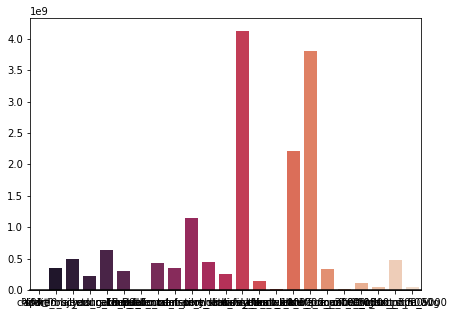

In [9]:
import seaborn as sns
train_columns = list(
 	set(df.select_dtypes(include=['float64','int64']).columns) - set(['id', 'timestamp', 'price_doc','ID_big_road1']))
y = df['price_doc'].values
x = df[train_columns].values
y = y[~np.isnan(x).any(axis=1)]
x = x[~np.isnan(x).any(axis=1)]
test = SelectKBest(score_func=chi2,k=23)
model = test.fit(x,y)
np.set_printoptions(precision=4)
scores = model.transform(x)
support = model.get_support()
features = df.loc[:,support].columns.tolist()
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
x1 = np.array(features)
scores2 = []
for i in range(len(model.scores_)):
    if support[i] == True:
        scores2.append(model.scores_[i])

y1 = np.array(scores2)
sns.barplot(x=x1,y=scores2,palette='rocket',ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
for i in features:
    print(i)